## Introduction to the Case study

**Business context.** You are the data scientist that would predict the sales price in future for each house in King County.

**Problem statement.** You want to identify <i>"Predict the sales price for each house in future based on certain input variables."</i>

**Analytical context** We will be working on a dataset that has sales prices of houses in King County. As a data scientist, you are given a responsibility to create a machine learning model that would predict the sales price for each house in future based on certain input variables. The target variable in this dataset is 'price' and you are given a new unseen test dataset on which you will have to predict price of each house.

## Importing the packages for data analysis

We will use three main packages: ```pandas```,``` numpy``` and `scipy` library. Let's import these packages using the keyword ``import``. We will change the name from ``pandas`` to ```pd```,```numpy``` to ```np```, using the keyword ``as``. From ``scipy`` we will import the ``train_test_split`` package that allows us to split data into train and test data. We will import the function ``LinierRegression`` which allows us to make model.

In [1]:
# libraries for numerical
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# libraries for machine learning
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In this dataset the sales price of houses in King County (Seattle) are present. It includes homes sold between May 2014 and May 2015. Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data.

1. price: price of the house. This is our target variable.
2. bedrooms: Number of bedrooms
3. bathroooms: Number of bathrooms
4. sqft_living: Square footage of house
5. sqft_lot: Square footage of lot
6. floors: Number of floors/ Level
7. waterfront: 1 = Waterfront view; 0 = No waterfront view
8. view: 1 = House been viewed; 0 = House has not been viewed
9. condition: 1 indicates worn out property and 5 excellent
10. grade: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent
11. sqft_above: Square footage of house apart from basement
12. sqft_below: Square footage of the basement
13. yr_built: Year of house built
14. yr_renovated: Year of house renovated
15. zipcode: Zip code
16. lat: Latitude coordination
17. long: Longitude coordination
18. sqft_living15: Square footage of house in 2015 (implies-- some renovations)
19. sqft_lot15: Square footage of lot in 2015 (implies-- some renovations)

To get a better idea of the data available, let's first take a look at the King County house data. `Pandas` allows you to easily read CSV files by using the `pd.read_csv()` method:

In [2]:
# Load the kc housing dataset
house_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')

Using `df.head()` and `df.tail()` functions we can review the top and bottom samples. Unless otherwise specified, `DataFrame` and `Series` objects have indices starting from 0 and incrementing monotonically as integers:

In [3]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_data.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16608,245000.0,2,1.0,670,1675,1.0,0,0,5,6,670,0,1960,0,98144,47.5918,-122.295,1220,1740
16609,275000.0,4,2.0,1480,15000,1.0,0,0,4,7,1480,0,1957,0,98055,47.4312,-122.196,1450,8768
16610,270000.0,3,2.0,2330,8000,1.0,0,0,3,7,1390,940,1986,0,98023,47.2958,-122.368,1570,7227
16611,767250.0,4,3.0,2170,2500,2.0,0,0,3,8,1710,460,1997,0,98115,47.6742,-122.303,2170,4080
16612,229000.0,3,2.0,1760,9900,1.0,0,0,4,7,1760,0,1943,0,98166,47.4783,-122.338,1190,9900


It may be noted that there are 16613 records, each containing 19 column values. The DataFrame's size can be obtained by using the `shape` attribute:

In [5]:
house_data.shape

(16613, 19)

The ```house_data``` columns are:

In [6]:
house_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

The data types associated with the columns are:

In [7]:
house_data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Data preparation process: *Data Wrangling*

Although we have successfully imported the data included in the .csv file, a data preparation process is required for the analysis. This is called the **Data Wrangling** process, which is divided into three phases:

**1. Dataset Structuring**
In the first step of this structuring process, we will do nothing.

**2. Dataset Cleaning**

<br>
<font color=#090060>
In this step, the data is cleaned up for high-quality analysis. Missing values are handled, and the data is standardized.
</font>
<br>

First, we are going to list how many null values exist in terms of the total number of observations. This is done using the function `.isnull()` function. To visualize this results in an aggregate way, we can use the `.sum()` function, which allows counting the data cataloged as null or non-existent:

In [8]:
((house_data.isnull().sum()/len(house_data))*100).sort_values(ascending=False)

sqft_lot15       0.0
condition        0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
grade            0.0
sqft_living15    0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
price            0.0
dtype: float64

Let's graph the distribution of missing values in the dataset using the `missngno` library:

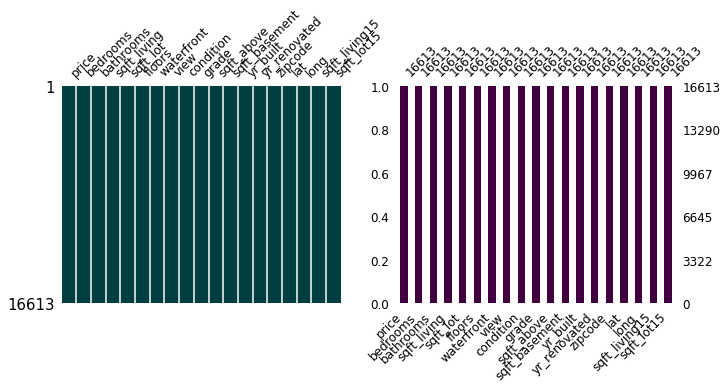

In [9]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
msno.matrix(house_data, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(house_data, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show()

There are no columns within our dataset that present nonexistent data. So we can't handing missing value. After it we proceed to verify the existence of duplicate rows. These types of rows are not usually the object of study in data science analysis, pus normally represent redundancy of the data that generates noise in subsequent analysis. To check which columns are duplicated in a DataFrame object, the `.duplicated()` function is used, which returns the indices of the duplicate rows. With these indices we can proceed to filter the DataFrame:

In [10]:
house_data[house_data.duplicated()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
4352,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
14983,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984


As we can see, there are three duplicated rows throughout the dataset that we will proceed to drop as follows:

In [11]:
print('Dimensions before dropping duplicated rows: ' + str(house_data.shape))
house_data = house_data.drop(house_data[house_data.duplicated()].index)
print('Dimensions after dropping duplicated rows: ' + str(house_data.shape))

Dimensions before dropping duplicated rows: (16613, 19)
Dimensions after dropping duplicated rows: (16610, 19)


In [12]:
house_data[house_data.duplicated()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


As shown, six repeated rows were dropped.

**3. Dataset Enriching**

After cleaning, the data is enriched by increasing some variables but we skip this step because we don't want to enrich the variabel.

# Exploratory Data Analysis (EDA)

*The Exploratory Data Analysis (EDA) refers to the critical process of conducting initial data research to discover patterns, detect anomalies, test hypotheses, and verify assumptions with the help of summary statistics and graphical representations.*

It is always interesting to know the basic statistical characteristics of each numerical variables.

In [13]:
# Basic Statistical details 
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.661000e+04,16610.000000,16610.000000,16610.000000,1.661000e+04,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000
mean,5.335285e+05,3.365984,2.062086,2053.884106,1.573960e+04,1.432450,0.007947,0.243889,3.449729,7.592414,1750.221734,303.662372,1967.294822,89.752258,98078.165202,47.560024,-122.215382,1974.796448,13288.307225
std,3.665432e+05,0.937193,0.758843,904.481774,4.195800e+04,0.509658,0.088794,0.781469,0.666610,1.168419,804.789558,450.735792,27.935174,413.623091,54.153733,0.139719,0.138661,673.028862,27458.700539
min,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1415.500000,5.455000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98033.000000,47.464600,-122.327000,1490.000000,5421.500000
50%,4.470000e+05,3.000000,2.000000,1899.500000,7.902500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573000,-122.231000,1830.000000,7823.000000
75%,6.389250e+05,4.000000,2.500000,2500.000000,1.107075e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2140.000000,600.000000,1990.000000,0.000000,98118.000000,47.679075,-122.127250,2330.000000,10326.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,871200.000000


Let's explore different statistical measures that we have got from desribe().


*   **count:** total count of non-null values in the column
*   **mean**: the average of all the values in that column
*   **min:** the minimum value in the column
*   **max:** the maximum value in the column
*   **25%:** first quartile in the column after we arrange those values in ascending order
*   **50%:** this is the median or the second quartile
*   **75%:** the third quartile 
*   **std:** this is the standard deviation (i.e. measure of depreciation, you must have read in the basics of statistics study material)

**Note:** 25%, 50%, and 75% are nothing but corresponding percentile values

Our brains are good at spotting patterns in pictures. Let's play around different types of data visualizations.

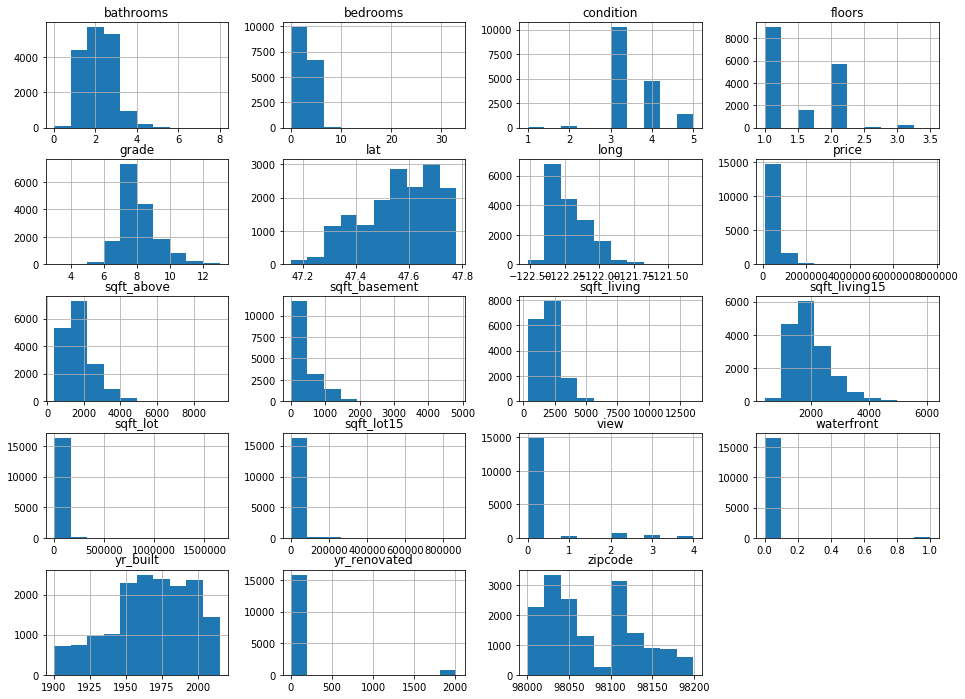

In [14]:
#histogram
house_data.hist(bins=10, figsize=(16,12))
plt.show()

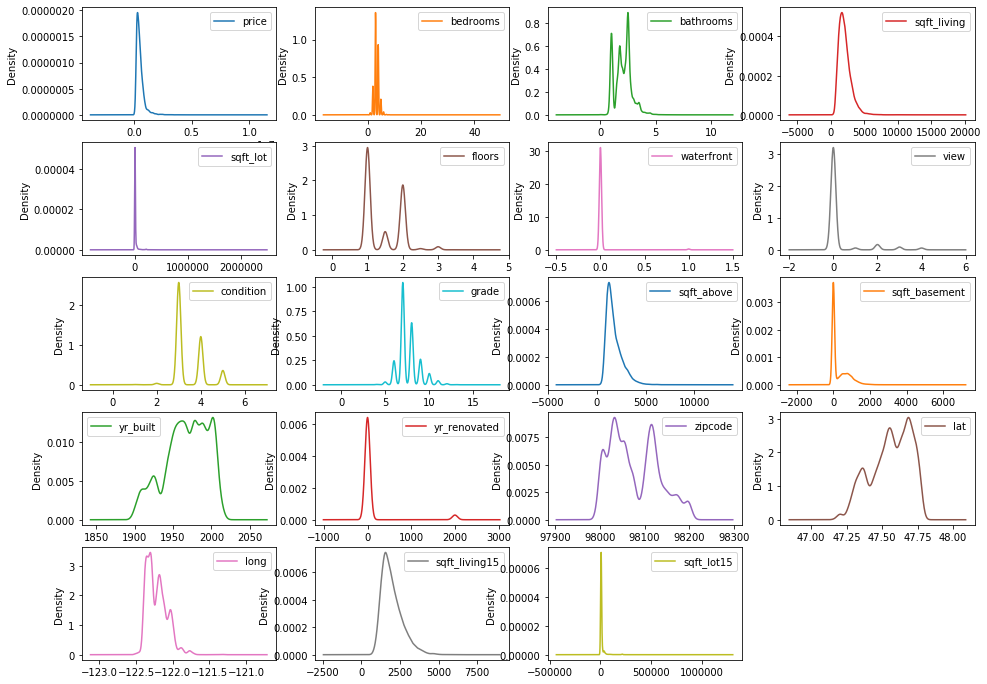

In [15]:
# Density
house_data.plot(kind='density', subplots=True,figsize=(16,12),layout=(5,4), sharex=False)
plt.show()

The attributes '**density**' and '**pH**' are quite normally distributed (you must have read about normal distribution in basic statistics study material). Now looking at the attribute **quality**, we can observe that the wines with average quality (i.e. quality rating 5 to 7) are more than bad and good quality of wines.

We can check how each features are reated with others using corr() function.

The correlation value ranges between -1 to 1.When it is close to 1, it means that there is a strong positive correlation. When the coefficient is close to –1, it means that there is a strong negative correlation. Finally, coefficients close to zero mean that there is no linear correlation. We can observe the detail information using correlation matrix

In [16]:
house_data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.297588,0.520181,0.700894,0.092406,0.278328,0.279747,0.405115,0.046739,0.662405,0.603299,0.329278,0.036889,0.134122,-0.046677,0.306882,0.015346,0.598532,0.080662
bedrooms,0.297588,1.000000,0.516642,0.559759,0.034423,0.204662,-0.001671,0.083803,0.033258,0.352096,0.451952,0.316294,0.162206,0.021875,-0.140029,-0.000625,0.112345,0.368836,0.029746
bathrooms,0.520181,0.516642,1.000000,0.760310,0.099703,0.502980,0.075108,0.203464,-0.093735,0.658079,0.684186,0.304083,0.485360,0.066945,-0.204228,0.024244,0.225808,0.578968,0.098211
sqft_living,0.700894,0.559759,0.760310,1.000000,0.179934,0.399161,0.115929,0.296102,-0.048381,0.767406,0.867276,0.458156,0.325525,0.066564,-0.182919,0.061403,0.221773,0.753775,0.186574
sqft_lot,0.092406,0.034423,0.099703,0.179934,1.000000,0.025031,0.021205,0.067864,-0.019348,0.130442,0.197070,0.009200,0.091140,0.005156,-0.127774,-0.089431,0.228601,0.159724,0.719523
floors,0.278328,0.204662,0.502980,0.399161,0.025031,1.000000,0.034480,0.055728,-0.221416,0.461520,0.578836,-0.232524,0.418308,0.035428,-0.081384,0.034144,0.164825,0.328633,0.021085
waterfront,0.279747,-0.001671,0.075108,0.115929,0.021205,0.034480,1.000000,0.403306,0.010819,0.090416,0.083431,0.083666,-0.015994,0.084975,0.032570,-0.013096,-0.042469,0.093247,0.031508
view,0.405115,0.083803,0.203464,0.296102,0.067864,0.055728,0.403306,1.000000,0.040238,0.264756,0.180035,0.272729,-0.036368,0.097999,0.088223,0.004064,-0.083367,0.293323,0.063307
condition,0.046739,0.033258,-0.093735,-0.048381,-0.019348,-0.221416,0.010819,0.040238,1.000000,-0.124867,-0.147332,0.165976,-0.317560,-0.075426,-0.002757,-0.017505,-0.109538,-0.090751,-0.018623
grade,0.662405,0.352096,0.658079,0.767406,0.130442,0.461520,0.090416,0.264756,-0.124867,1.000000,0.762183,0.179058,0.434290,0.023419,-0.190023,0.112711,0.209409,0.737717,0.132677


From the above correlation matrix, we can observe that there is a relatively high positive correlation between **price** and **sqft_living**, **price** and **grade*. Similarly we can observe there is a relatively high negative correlation between **long** and **zipcode**.

For understanding how much each attribute correlates with the quality score of wine compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes.

In [17]:
corr_matrix = house_data.corr()
print(corr_matrix["price"].sort_values(ascending=False))

price            1.000000
sqft_living      0.700894
grade            0.662405
sqft_above       0.603299
sqft_living15    0.598532
bathrooms        0.520181
view             0.405115
sqft_basement    0.329278
lat              0.306882
bedrooms         0.297588
waterfront       0.279747
floors           0.278328
yr_renovated     0.134122
sqft_lot         0.092406
sqft_lot15       0.080662
condition        0.046739
yr_built         0.036889
long             0.015346
zipcode         -0.046677
Name: price, dtype: float64


We can plot the above correlation matrix using heatmaps too. The visualization using heatmap is a pictorial visualization.

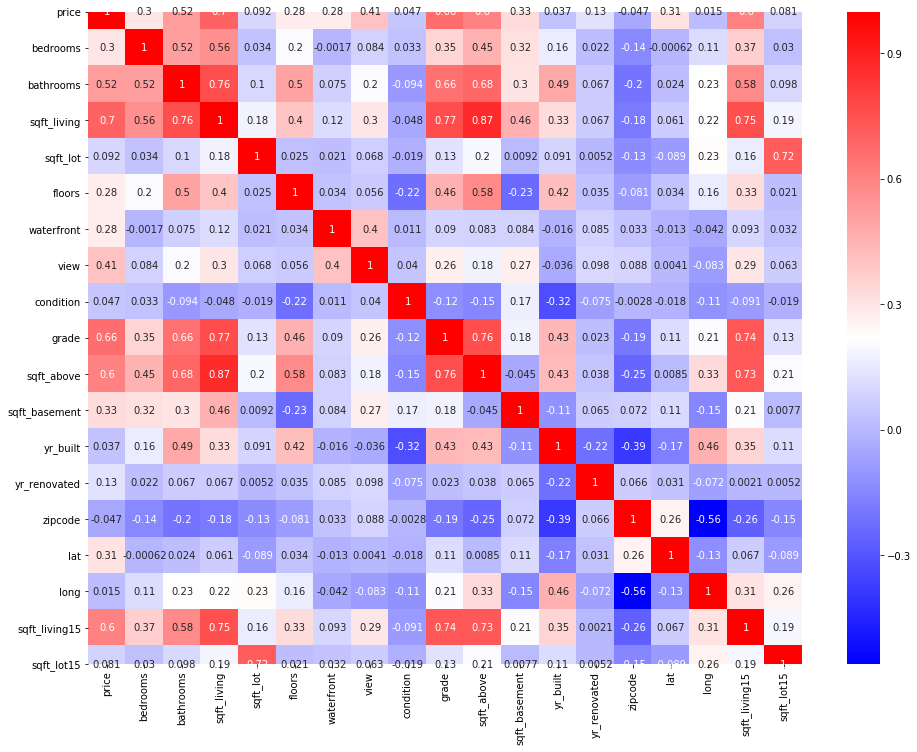

In [18]:
plt.figure(figsize=(16, 12))
sns.heatmap(house_data.corr(), cmap='bwr', annot=True)     # annot = True: to display the correlation value in the graph

We can visualize scatterplot matrix for the better understanding relationship between a pair of variables. It plots every numerical attribute against every other. 'pairplot' of seaborn helps to achieve this

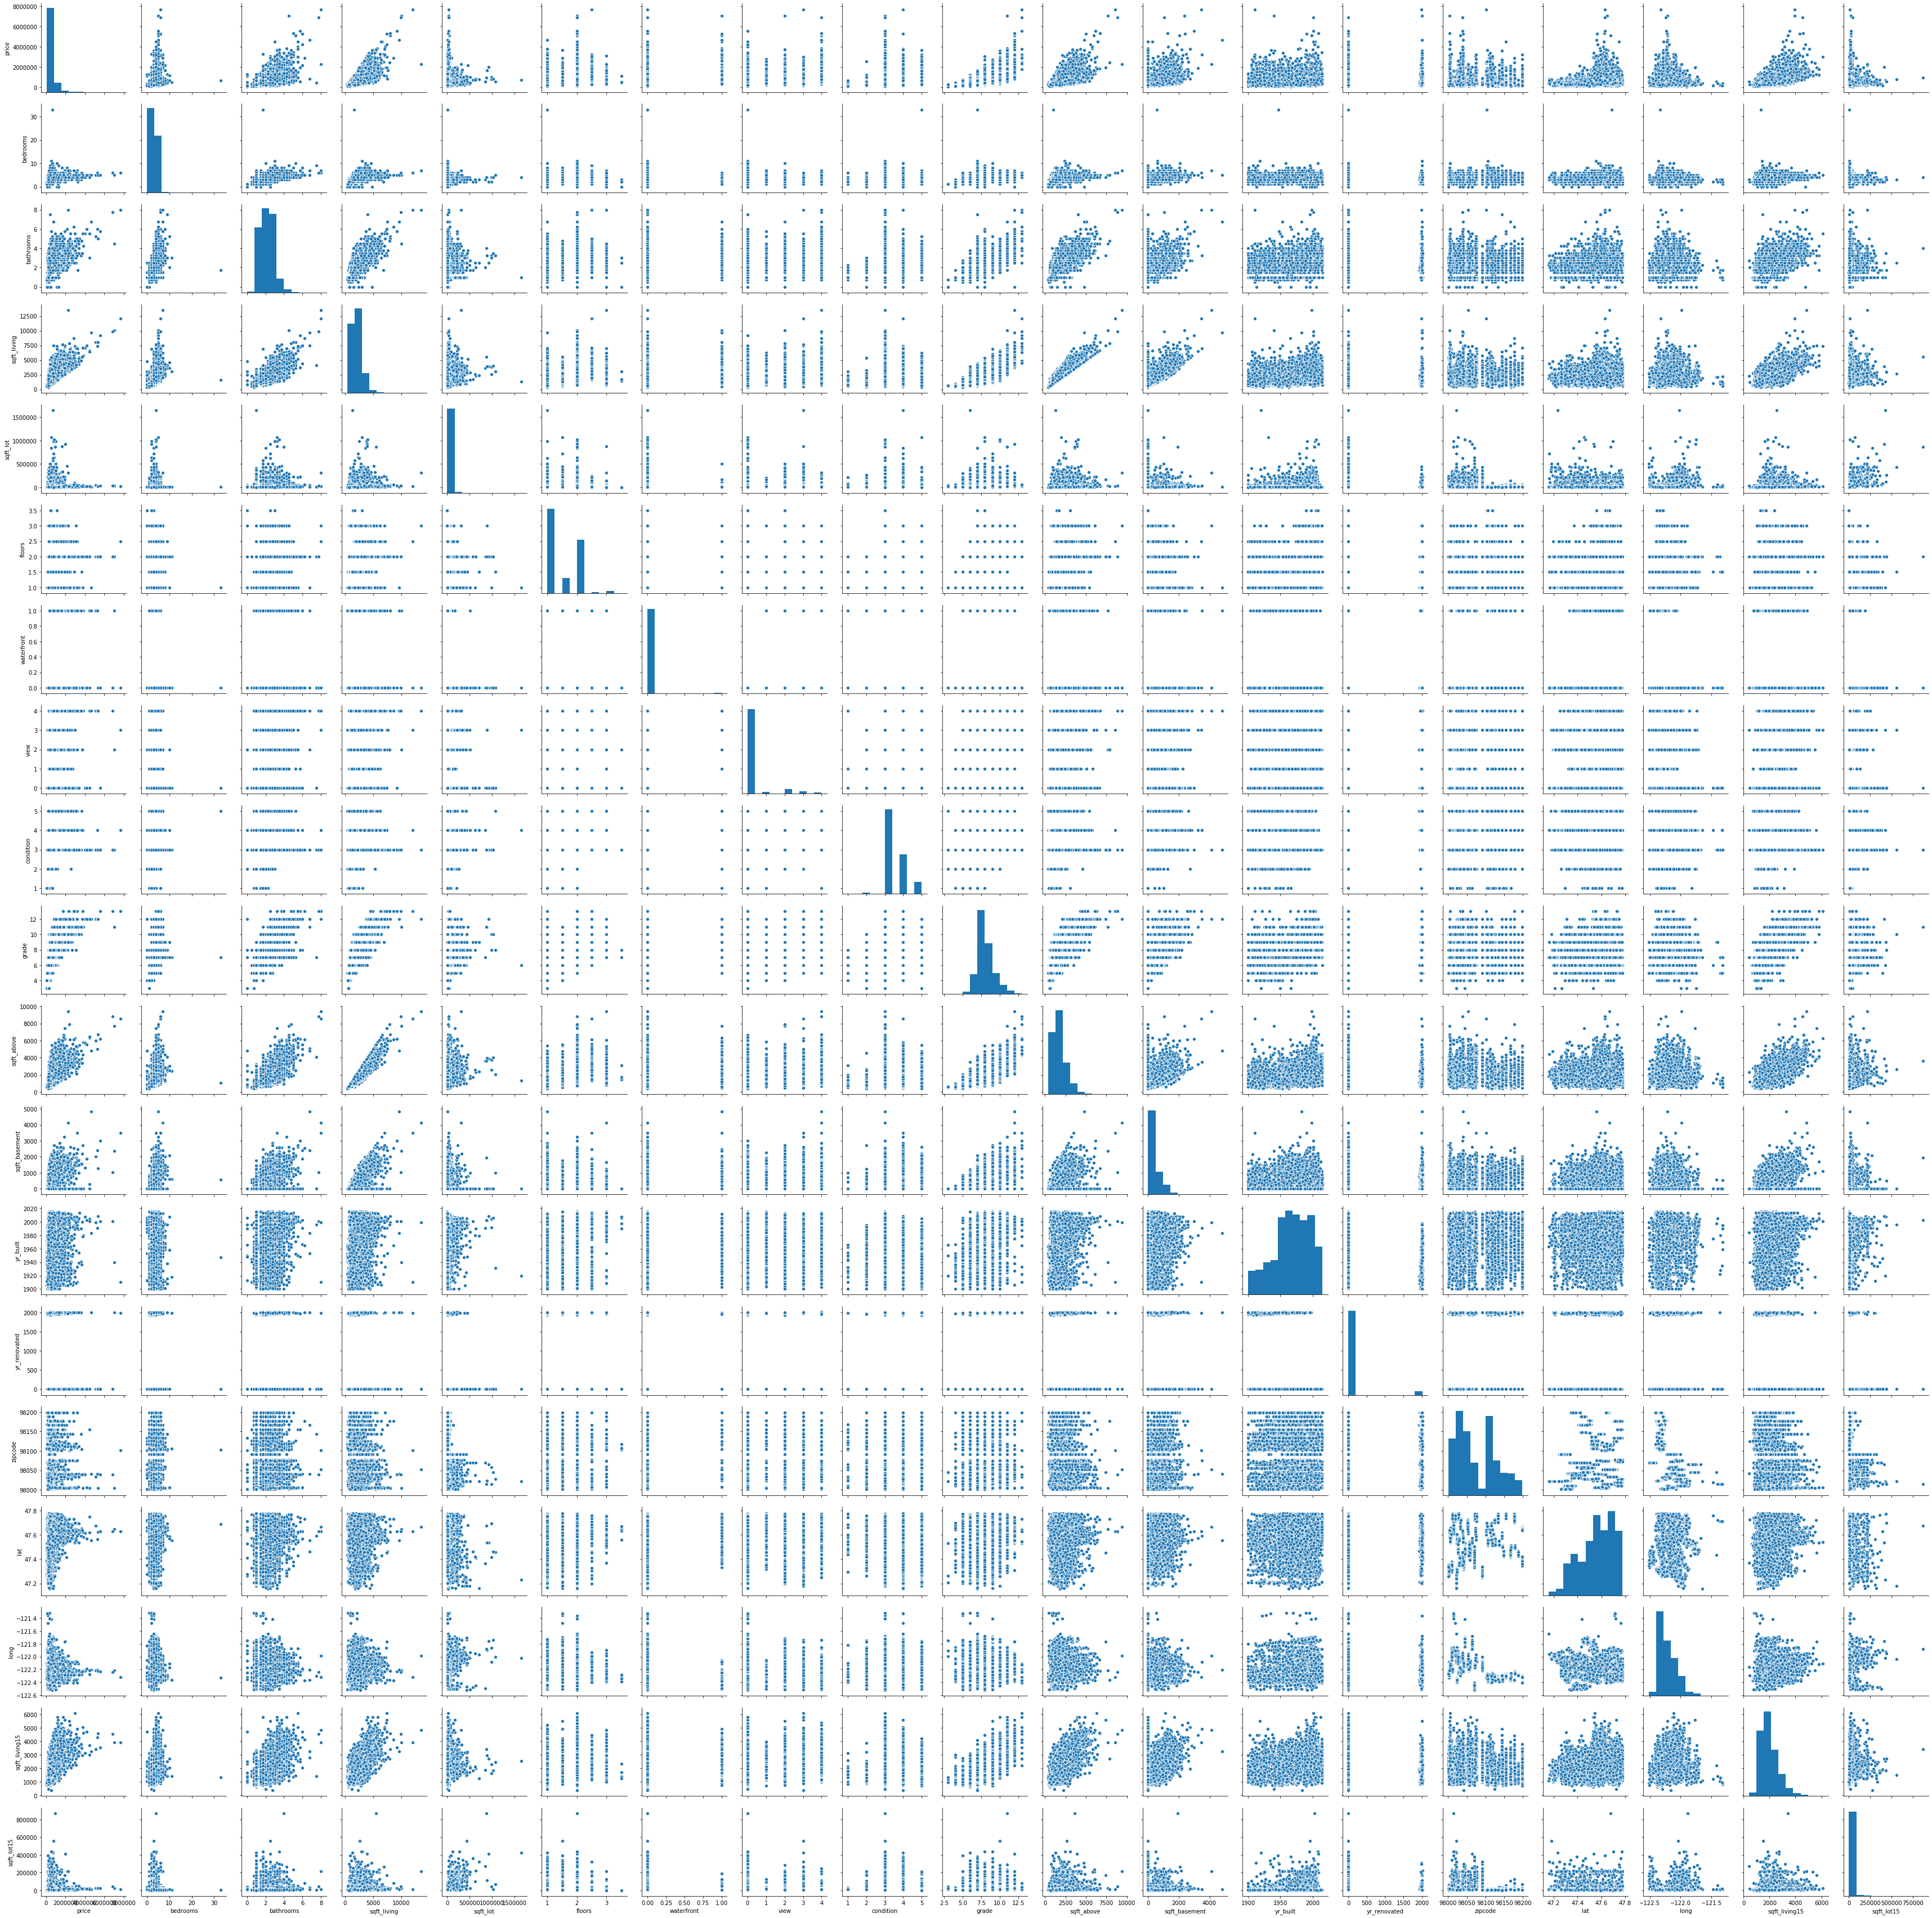

In [19]:
sns.pairplot(house_data)

## Separating Input and Output Variables

In [20]:
X = house_data.drop('price', axis = 1)
y = house_data['price']

## Split The Data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(13288, 18) (13288,)
(3322, 18) (3322,)


## Model Building

In [22]:
# We will be further discussing about why Random Forest is in ensemble module of sklearn library
from sklearn.ensemble import RandomForestClassifier

In [23]:
model = RandomForestClassifier(n_estimators = 100)

In [24]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
from sklearn.metrics import mean_absolute_error
# Model evaluation for training set
y_train_pred = model.predict(X_train)
rmse = mean_absolute_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

# Examine the first 10 predicted output from the model
output = pd.DataFrame(y_train[0:10])
output['Predicted'] = y_train_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Model evaluation for testing set
y_test_pred = model.predict(X_test)
rmse = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

output = pd.DataFrame(y_test[0:10])
output['Predicted'] = y_test_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

           price  Predicted  Difference
3461    329500.0   329500.0         0.0
6850    343000.0   343000.0         0.0
1147    510000.0   510000.0         0.0
5232    438500.0   438500.0         0.0
12431   595000.0   595000.0         0.0
10348  1197000.0  1197000.0         0.0
15506   699000.0   699000.0         0.0
10173   890000.0   890000.0         0.0
9745   1080000.0  1080000.0         0.0
5379    779000.0   779000.0         0.0 

Model training performance:
---------------------------
RMSE is 999.0974563515954
R2 score is 0.9985245608717815


           price  Predicted  Difference
8333    925000.0   949000.0     24000.0
13611   348580.0   290000.0    -58580.0
12055   655000.0   675000.0     20000.0
8133    170000.0   126000.0    -44000.0
4641    898000.0   875000.0    -23000.0
12822   343000.0   247500.0    -95500.0
7522    470000.0   430000.0    -40000.0
11092   272000.0   280000.0      8000.0
9844    818000.0   825000.0      7000.0
14139  2110000.0  1220000.0   -890000.0 

M

**Model Building 2**

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# Model evaluation for training set
y_train_pred_2 = model_2.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred_2)))
r2 = r2_score(y_train, y_train_pred_2)

# Examine the first 10 predicted output from the model
output = pd.DataFrame(y_train[0:10])
output['Predicted'] = y_train_pred_2[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Model evaluation for testing set
y_test_pred_2 = model_2.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred_2)))
r2 = r2_score(y_test, y_test_pred_2)

output = pd.DataFrame(y_test[0:10])
output['Predicted'] = y_test_pred_2[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

           price  Predicted  Difference
3461    329500.0   329500.0         0.0
6850    343000.0   343000.0         0.0
1147    510000.0   510000.0         0.0
5232    438500.0   438500.0         0.0
12431   595000.0   595000.0         0.0
10348  1197000.0  1197000.0         0.0
15506   699000.0   699000.0         0.0
10173   890000.0   890000.0         0.0
9745   1080000.0  1080000.0         0.0
5379    779000.0   779000.0         0.0 

Model training performance:
---------------------------
RMSE is 13987.9982462094
R2 score is 0.9985245608717815


           price  Predicted  Difference
8333    925000.0  1550000.0    625000.0
13611   348580.0   330000.0    -18580.0
12055   655000.0   752500.0     97500.0
8133    170000.0   352000.0    182000.0
4641    898000.0   824000.0    -74000.0
12822   343000.0   610000.0    267000.0
7522    470000.0   525000.0     55000.0
11092   272000.0   319000.0     47000.0
9844    818000.0   678000.0   -140000.0
14139  2110000.0  1256500.0   -853500.0 

Mo

**Model Building 3**

In [29]:
model_3 = LinearRegression(normalize = True)
model_3.fit(X_train, y_train)

LinearRegression(normalize=True)

In [30]:
# Model evaluation for training set
y_train_pred_3 = model_3.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred_3)))
r2 = r2_score(y_train, y_train_pred_3)

# Examine the first 10 predicted output from the model
output = pd.DataFrame(y_train[0:10])
output['Predicted'] = y_train_pred_3[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Model evaluation for testing set
y_test_pred_3 = model_3.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred_3)))
r2 = r2_score(y_test, y_test_pred_3)

output = pd.DataFrame(y_test[0:10])
output['Predicted'] = y_test_pred_3[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

           price     Predicted     Difference
3461    329500.0  4.355725e+05  106072.459067
6850    343000.0  3.533847e+05   10384.727425
1147    510000.0  5.984203e+05   88420.295807
5232    438500.0  5.258034e+05   87303.401626
12431   595000.0  5.862429e+05   -8757.116344
10348  1197000.0  1.041122e+06 -155878.163411
15506   699000.0  8.003249e+05  101324.941022
10173   890000.0  6.723112e+05 -217688.791334
9745   1080000.0  9.915348e+05  -88465.184472
5379    779000.0  7.526453e+05  -26354.660795 

Model training performance:
---------------------------
RMSE is 200618.1167702437
R2 score is 0.6965057573071595


           price     Predicted    Difference
8333    925000.0  7.971738e+05 -1.278262e+05
13611   348580.0  3.835165e+05  3.493646e+04
12055   655000.0  6.263229e+05 -2.867706e+04
8133    170000.0  4.384472e+04 -1.261553e+05
4641    898000.0  1.061840e+06  1.638401e+05
12822   343000.0  3.413594e+05 -1.640621e+03
7522    470000.0  4.660079e+05 -3.992073e+03
11092   272000.0 

## Load New Test Data

In [31]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_new_test_data.csv')

In [32]:
test_new.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5,3.25,5210,35765,2.5,0,4,5,10,4940,270,1911,0,98136,47.5463,-122.397,2590,10250
1,5,2.00,2800,17788,1.0,0,0,4,8,1400,1400,1963,0,98033,47.6719,-122.163,1760,18282
2,4,2.25,2060,44431,2.0,0,0,3,7,2060,0,1988,0,98077,47.7440,-122.046,2160,45657
3,5,2.00,2360,19899,1.0,0,0,4,7,2360,0,1968,0,98010,47.3299,-122.046,1860,19998
4,4,2.50,2370,6557,2.0,0,0,3,9,2370,0,1998,0,98042,47.4230,-122.155,2370,7378


In [37]:
test_new.shape

(4999, 18)

## Prediction on new Test Data

In [33]:
price_predict = model_3.predict(test_new)

# How to save prediciton results locally via jupyter notebook?
If you are working on Jupyter notebook, execute below block of codes. A file named 'prediction_results_HP.csv' will be created in your current working directory.

In [36]:
res = pd.DataFrame(price_predict)
res.index = test_new.index # its important for comparison
res.columns = ["price"]
res.to_csv("prediction_results_HP.csv")      # the csv file will be saved locally on the same location where this notebook is located.